# 1.
The predictor variable $x_i$ is the independent variable that is used as input to predict the outcome variable $Y_i$ (which is dependent on $x_i$) by interpolating from the regression line. The regression line $Y_i=\beta_0+\beta_1x_i+\varepsilon_i$ is a linear line with $y$-intercept of $\beta_0$ (the expected value when $x_i$ is zero), slope of $\beta_1$ which represents the rate of change in $Y_i$ per unit change in $x_i$, and error term $\varepsilon_i$ which accounts for diviations from the expected linear trend, is normally distributed with a mean of zero and variance of $\sigma^2$.

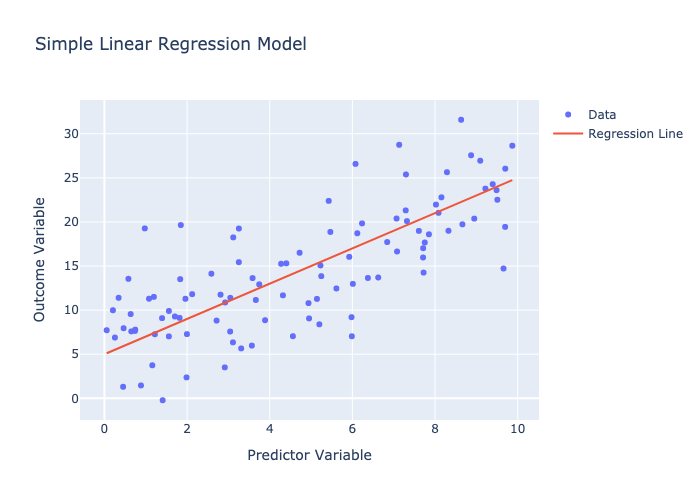

In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# Setting seed for reproducibility
np.random.seed(42)

# Parameters for the model
beta0 = 5  # Intercept
beta1 = 2  # Slope
sigma = 5   # Standard deviation of the error term
n = 100

# Generate random values for predictor variable X
X = np.random.uniform(0, 10, n)  # n random points between 0 and 10

# Generate Y values based on the linear model with added noise
# Y = beta_0 + beta_1 * X + epsilon, where epsilon ~ N(0, sigma^2)
epsilon = norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * X + epsilon

# Plotting the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=X, y=beta0+beta1*X, mode='lines', name="Regression Line"))
fig.update_layout(title='Simple Linear Regression Model', xaxis_title='Predictor Variable',yaxis_title='Outcome Variable', showlegend=True)
fig.show(renderer='png')

# 2.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     133.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           5.45e-20
Time:                        15:31:02   Log-Likelihood:                -292.09
No. Observations:                 100   AIC:                             588.2
Df Residuals:                      98   BIC:                             593.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0755      0.851      7.136      0.0

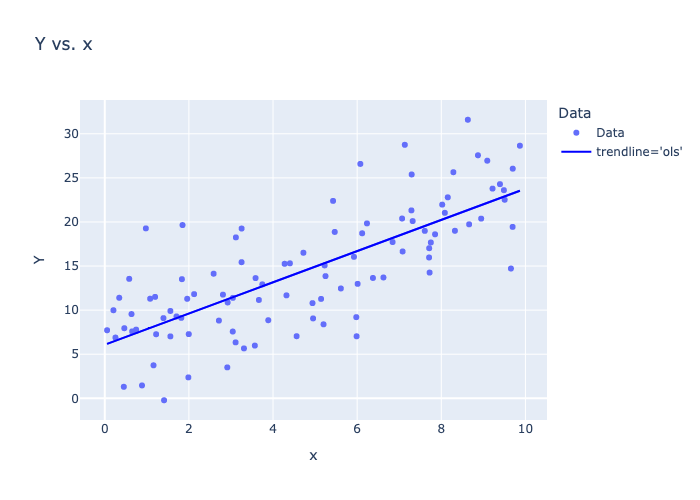

In [2]:
import statsmodels.formula.api as smf  # library for specifying statistical models using a formula syntax similar to R
import plotly.express as px  # this is a ploting library
import pandas as pd

df = pd.DataFrame(data={'x':X, 'Y':Y})

# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df) # specifies a linear regression model using ordinary least squares (ols)
fitted_model = model_data_specification.fit() # computes the estimates of the regression coefficients 

# what do each of the following provide?
print(fitted_model.summary(),  # provides a summary of the results of the regression model
fitted_model.summary().tables[1],  # access the tabel at the 1st index of .summary()
fitted_model.params,  # provides the estimated beta0 and beta1 values
fitted_model.params.values,  # returns the estimated beta0 and beta1 in a list
fitted_model.rsquared, sep='\n')  # r squared value of the regression model, how well the model fits the data

# Adds legend and a scatter plot of x against Y
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer='png')

# 3.
The line in the first question is drawn using population parameters $\beta_0$ and $\beta_1$ that I selected hence it never changes. Whereas the line in the second question is the trendline of data simulated by interpolating from the population model and then adding an error term that is randomly sampled from a normal distribution. The error term make the simulated data to deviate from the model, and due to random sampling variation, every simulation is diferent from another, hence the trendline varies from simulation to simulation. The slope and intercept of every trendline $(\hat{\beta_0}$ and $\hat{\beta_1})$ are estimates of the population parameter.

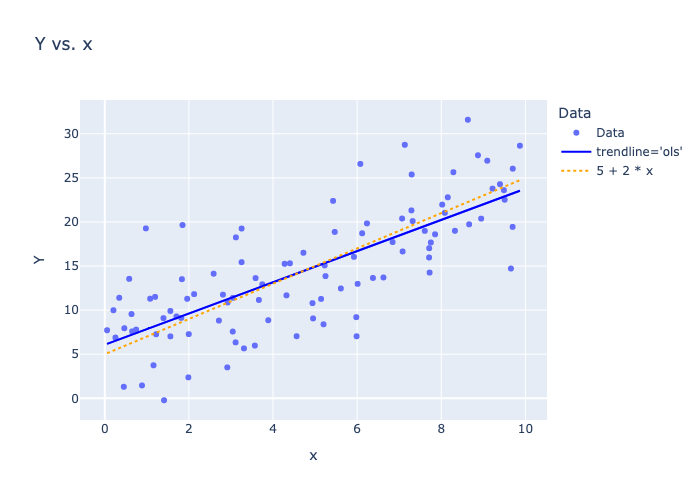

In [3]:
x_range = np.array([df['x'].min(), df['x'].max()])

y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer='png')

# 4.
In the `coef` column of `fitted_model.summary().tables[1]`, in `fitted_model.params`, and in `fitted_model.params.values` contains the estimated intercept $(\hat{\beta_0})$ and slope $(\hat{\beta_1})$. Therefore the `fitted_model.fittedvalues` are obtained by plugging the predictor variable $x_i$ into the estimated linear regression model $(\hat{y_i}=\hat{\beta_0}+\hat{\beta_1}x_i)$.

# 5.
Using the ols method ensures that the trendline minimizes the sum of the square of the differences between the observed data and the predicted values using the trendline. The reason that it is squared is to avoid cancelation, as squaring ensures that it is always positive, if it wasn't squared then the positive and negative differences would cancel out and the line $\bar{y}$ would have a sum of difference close to 0.

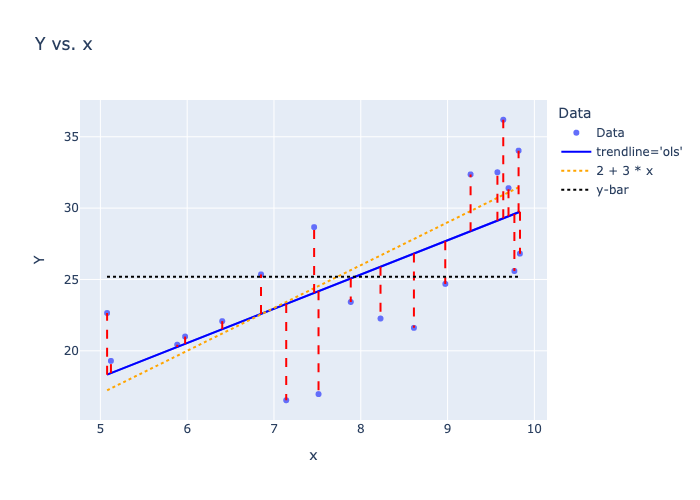

In [4]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer='png')

# 6.
$R^2=1-\frac{\sum_{i=1}^n(Y_i-\hat{y})^2}{\sum_{i=1}^n(Y_i-\bar{Y})^2}$, in the case of the first expression, $\hat{y_i}=$`fitted_model.fittedvalues`, which makes it exactly the formula for $R^2$. $\sum_{i=1}^n(Y_i-\hat{y})^2$ is the sum of the square of the residuals which indicates the the unexplained variation in $Y$, $\sum_{i=1}^n(Y_i-\bar{Y})^2$ is the sum of squared deviations of $Y$ from its mean, which indicates the total variation in Y. Hence the fraction repesents the proportion of unexplained variation in $Y$, and taking its compliment gives the proportion of variation in $Y$ that is explained by the model.

Since $R^2$ indicates the proportion of variation in $Y$ that is explained by the model, in other words how accuratly the model aligns with the actual data.

`np.corrcoef()` calculates the Pearson correlation between 2 variables. The square of the correlation between the fitted values and the actual data is $R^2$ as it measures the proportion of the actual data that aligns with the linear relationship of the fitted values. The square of the correlation between $Y$ and $x$ is also $R^2$ as it measures the proportion of the actualy data that aligns with the linear relationship with $x$.

# 7.
The relationship between Amount of Fertilizer and Crop Yield does not seem to be linear but instead exponentially increasing. The residuals does not appear to be normally distributed with a mean of 0.

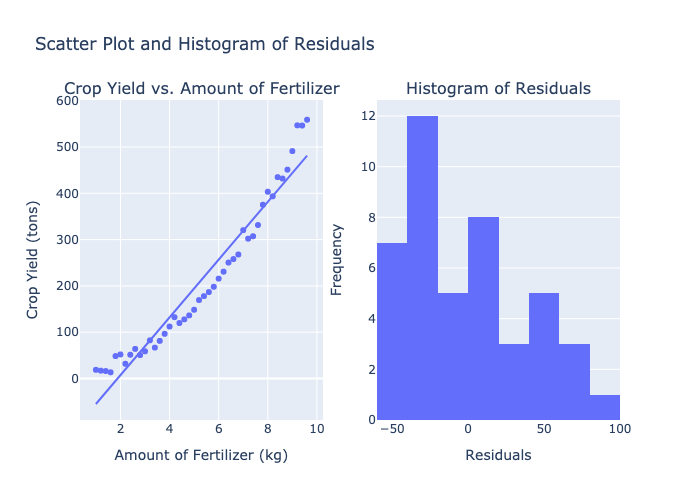

In [5]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png')

### Chatbot Summary
Here’s a concise summary of our exchanges:

Simple Linear Regression (SLR) Basics: We discussed the components of the SLR model, including predictor and outcome variables, slope and intercept, and error terms. We reviewed how these components combine using ordinary least squares (OLS) to minimize squared errors, producing a fitted line that best explains the variation in the outcome variable, 𝑌.

Interpreting Model Fit (R-squared): We explored various expressions for R-squared, explaining it as the proportion of variation in 
𝑌 explained by the model. We used expressions like fitted_model.rsquared, the squared correlation coefficient (np.corrcoef), and manually computed variance proportions to show how each quantifies the model's accuracy.

Key SLR Assumptions: We reviewed essential SLR assumptions: linearity, independence and homoscedasticity of errors, normality of errors, absence of multicollinearity, and correct model specification. Each assumption's role in ensuring reliable, unbiased estimates and valid statistical inference was explained.

This summary reflects our discussions on theoretical and practical aspects of SLR, focusing on model interpretation, assumptions, and statistical validity.

Link: https://chatgpt.com/share/672bd9d3-3d64-8011-8df2-699e513d3ca3

# 8.

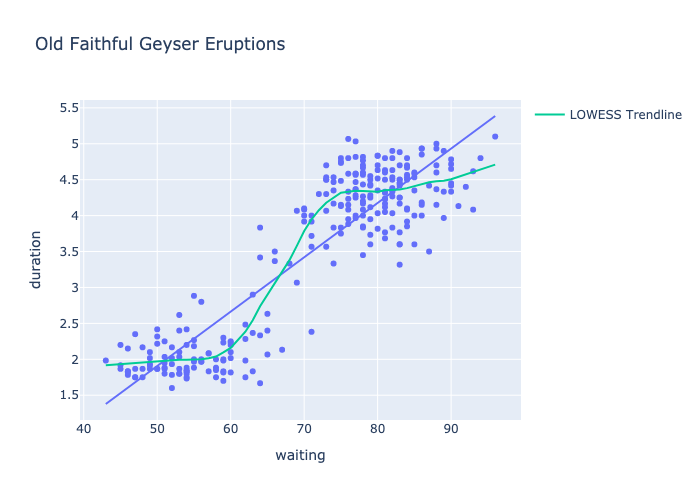

In [6]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png')

In [7]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')
 
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        15:31:32   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$H_0: \hat{\beta_0}\text{ on average is }\bar{y} \text{ and } \hat{\beta_1}\text{ on average is }0$$
Reject the null hypothesis at a p-value of 0.000 , very strong evidence against the null hypothesis. Duration is dependent on waiting, but the relationship is may not be linear.

# 9.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


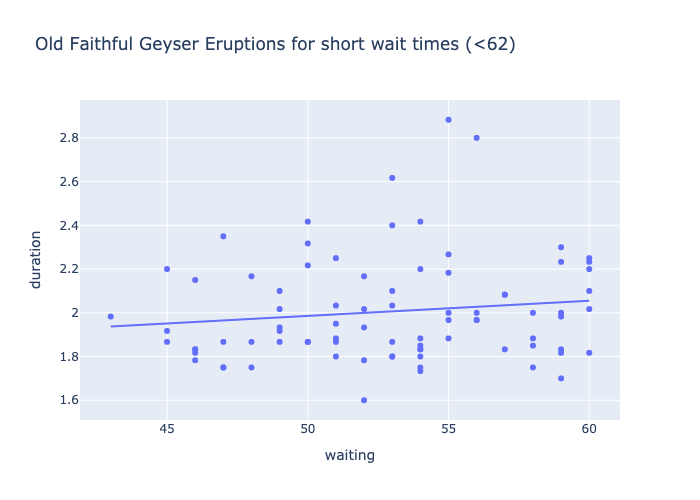

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


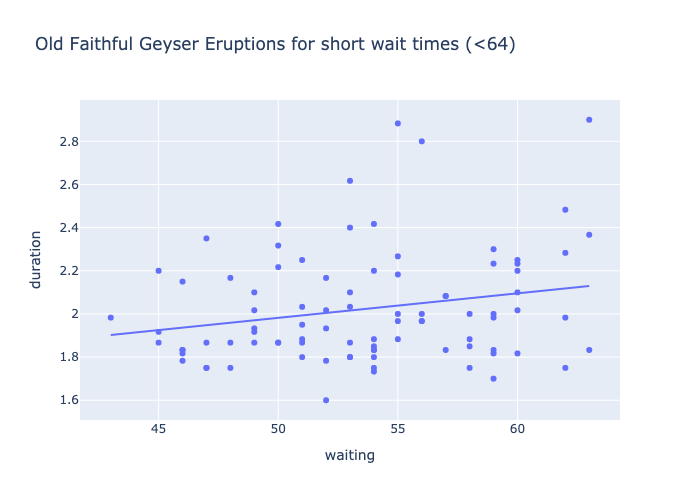

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


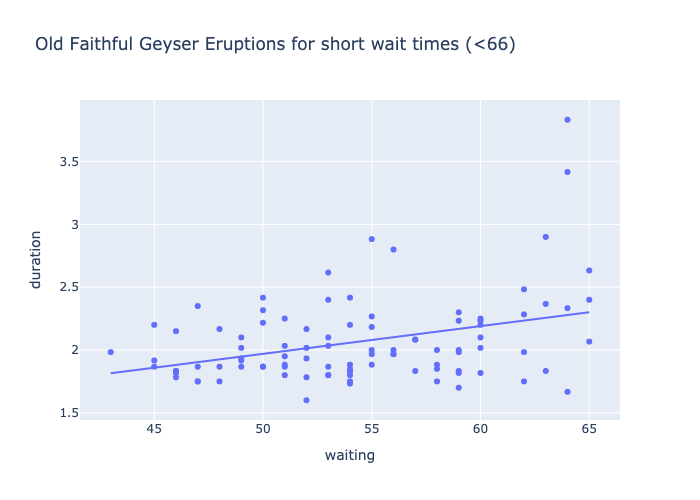

In [8]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = [62, 64, 66]
for time in short_wait_limit:
    short_wait = old_faithful.waiting < time

    print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

    # Create a scatter plot with a linear regression trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                    title="Old Faithful Geyser Eruptions for short wait times (<"+str(time)+")", 
                    trendline='ols')

    fig.show(renderer='png')

For waiting <62 no evidence against the null hypothesis, for <64 moderate evidence, and for <66 very strong evidence.

# 10.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


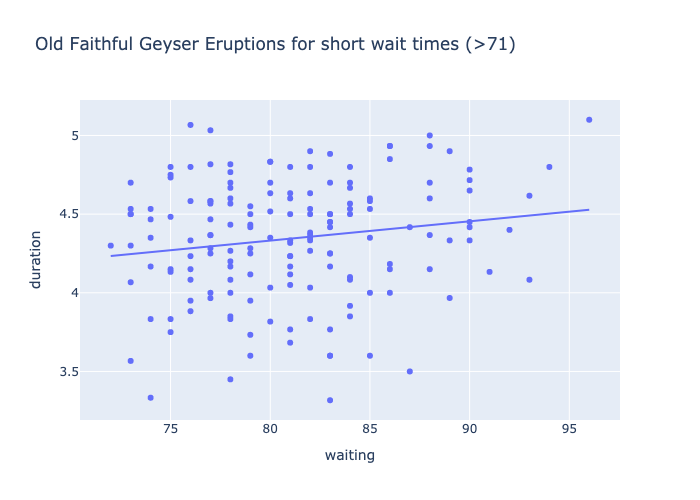

In [9]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer='png')

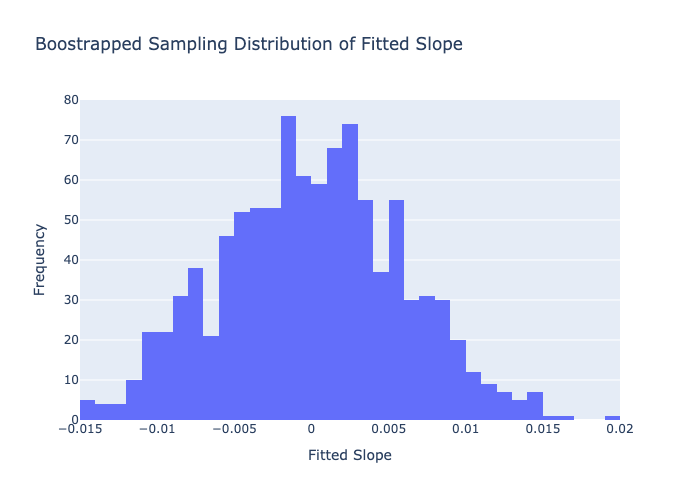

p-value: 0.032
95% Confidence Interval: [-0.01090606  0.01136054]


In [ ]:

observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]

n = 160
num_simulations = 1000
b0, b1, sigma = 1.65, 0, 0.37

simulated_data = old_faithful[long_wait].copy()

simulations = np.zeros(num_simulations)
np.random.seed(1)
for i in range(num_simulations):
    boot_data = pd.DataFrame(data={'waiting':simulated_data['waiting'].sample(n=long_wait.sum(), replace=True)})
    boot_data['duration'] = b0 + b1 * boot_data['waiting'] + stats.norm(loc=0, scale=sigma).rvs(size=n)
    simulations[i] = smf.ols('duration ~ waiting', data=boot_data).fit().params.iloc[1]

fig = px.histogram(simulations, title='Boostrapped Sampling Distribution of Fitted Slope', labels={'value':'Fitted Slope'})
fig.update_layout(showlegend=False, yaxis_title='Frequency')
fig.show(renderer='png')

print('p-value:', (np.abs(simulations) >= observed_slope).mean())
print('95% Confidence Interval:', np.quantile(simulations, [0.025, 0.975]))

0 is in the 95% confidence interval, and the p-value is slightly less than the one in `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`.

# 11.
The model using `duration ~ C(kind, Treatment(reference="short"))` uses the indicator variable 'kind' in the data (either long or short) to predict the duration of the eruption, compared to the 3 models using `duration ~ waiting` uses the waiting time (which is numerical) to predict the duration of the eruption where we characterized long or short based on a theshold in waiting time.

The new indicator variable based model shows very strong evidence against the null hypothesis.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


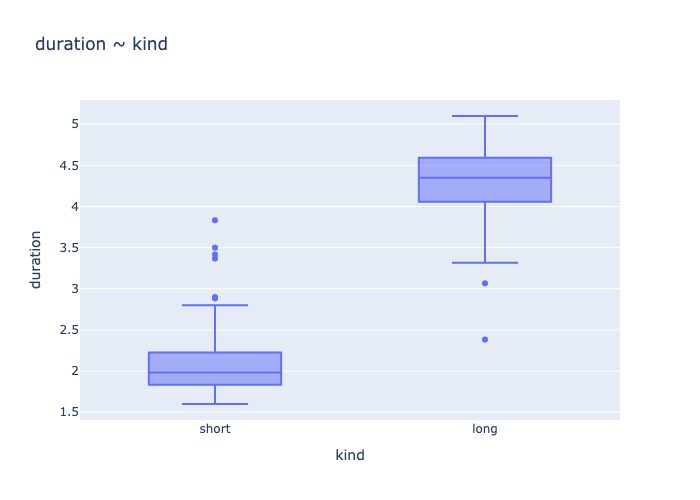

In [25]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png')

### Chatbot Summary
Certainly! Here’s a concise summary of our discussion:

Model Comparison: We examined the differences between several regression models analyzing duration of geyser eruptions. The models varied in their approach to predictors, using categorical encoding for kind (short vs. long) or linear relationships with waiting times across the entire dataset and within specific subsets.

Categorical Model Explanation: We focused on the formula duration ~ C(kind, Treatment(reference="short")). This model treats kind as a categorical variable, setting "short" as the reference level. The coefficients represent how the average duration changes for other kind levels (like "long") relative to "short".

Interpretation Example: In this model, the intercept provides the average duration for the "short" category, and each additional coefficient indicates the average difference in duration for other levels of kind relative to "short".

Let me know if you need any further adjustments!

Link: https://chatgpt.com/share/672c3463-a14c-8011-b824-e382daadf927

# 12.
The 4th histrogram (model 4) suggests the plausibility of the assumption that the distribution of the error terms is normal. Model 2 and 3 cannot be normal because they appear to be skewed and does not match the shape of the normal distribution. Although model 1 also seems symmetrical and appears to be normal, but it contains both long and short eruptions, the relationship does not appear to be linear as indicated by the scatter plot, and that it is not very likely that the error terms for long and short eruptions share the same standard deviation.

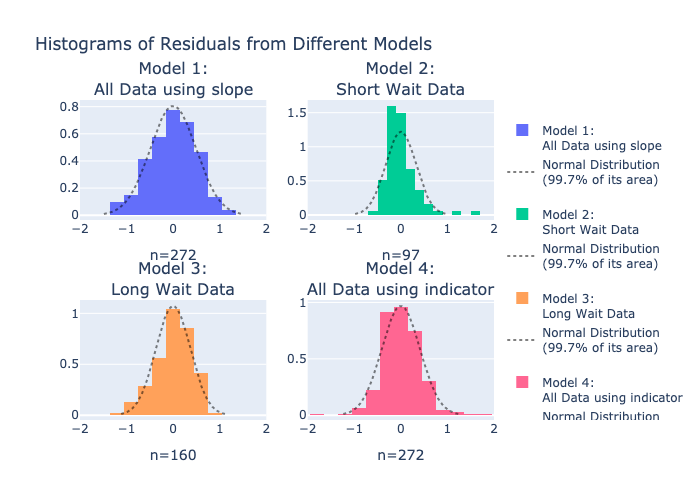

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png')

# 13.

In [31]:
observed_difference = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

n = 1000

permutation_test, bootstrap_test = np.zeros(n), np.zeros(n)
for i in range(n):
    permutation_test[i] = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values).groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrap_test[i] = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True).groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

print('(A) p-value:', (np.abs(permutation_test) >= observed_difference).mean())
print('(B) 95% Confidence Interval:', np.quantile(bootstrap_test, [0.025, 0.975]))

(A) p-value: 0.0
(B) 95% Confidence Interval: [2.09999526 2.29877708]


a) Permutation Test: For each iteration of the simulation, shuffle the kind column to redistribute long and short, then calculate the mean for the duration of the long and short eruptions separatly and record their difference.
Confidence Interval: For each iteration of the simulation, create a bootstrapped sample of the long eruptions and a bootstrapped sample of the short eruptions, calculate the mean of each bootstrapped sample and record their difference.

b) All 3 methods tests for whether on average there is a difference between the duration of long and short eruptions. In the indicator approach, the kind variable was used to predict the duration using short eruptions as a reference, if $\beta_{\text{contrast}}=0$ then on average there is no difference. The permutation test tests for whether the average duration for short and long eruptions are equal, if we fail to reject the null hypothesis then on average there is no difference. The double bootstrapping approach creates a 95% confidence interval for the average difference between long and short eruptions, which is similar to $\beta_{\text{contrast}}$, if 0 is in this interval then we cannot reject the possibility that on average there is no difference.

# 14.
Yes, I interacted with a chatbot.